In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
nb_classes = 10
Width = 100
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])

W1 = tf.Variable(tf.random_normal([784,Width]))
b1 = tf.Variable(tf.random_normal([Width]))
layer1 =  tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([Width,Width]))
b2 = tf.Variable(tf.random_normal([Width]))
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([Width,Width]))
b3 = tf.Variable(tf.random_normal([Width]))
layer3 = tf.sigmoid(tf.matmul(layer2,W3)+b3)


W4 = tf.Variable(tf.random_normal([Width,nb_classes]))
b4 = tf.Variable(tf.random_normal([nb_classes]))

In [8]:
hypothesis = tf.nn.softmax(tf.matmul(layer3,W4)+b4)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
is_correct = tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [9]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
batch_xs,batch_ys = mnist.train.next_batch(100)

In [11]:
training_epochs= 15
batch_size = 100

Epoch: 0001 cost =  1.538556977
Epoch: 0002 cost =  0.852077943
Epoch: 0003 cost =  0.684056343
Epoch: 0004 cost =  0.591991700
Epoch: 0005 cost =  0.528967202
Epoch: 0006 cost =  0.483717106
Epoch: 0007 cost =  0.448272808
Epoch: 0008 cost =  0.419344754
Epoch: 0009 cost =  0.396613909
Epoch: 0010 cost =  0.376031321
Epoch: 0011 cost =  0.359436429
Epoch: 0012 cost =  0.343485363
Epoch: 0013 cost =  0.330975109
Epoch: 0014 cost =  0.318629846
Epoch: 0015 cost =  0.307681484
label: [8]
prediction: [8]


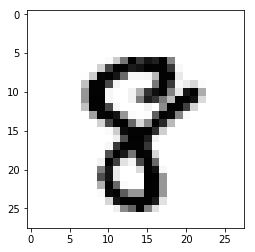

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost,optimizer],feed_dict = {X:batch_xs,Y:batch_ys})
            avg_cost +=c/total_batch
            
        print('Epoch:', '%04d' %(epoch +1), 'cost = ', '{:.9f}'.format(avg_cost))
        
    r = random.randint(0,mnist.test.num_examples -1)
    print('label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print('prediction:', sess.run(tf.argmax(hypothesis,1),feed_dict = {X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap = 'Greys', interpolation = 'nearest')
    plt.show()